In [1]:
# Importing all the Required Libraries
# 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode
import seaborn as sns
import datetime as dt
import warnings
import json
import os
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)
init_notebook_mode(connected=True)

In [2]:
df=pd.read_csv('songs_normalize.csv')

In [3]:
#checking for duplicate values
df.duplicated().value_counts()
df.drop_duplicates(inplace=True)

In [4]:
fig=px.pie(df.groupby('explicit',as_index=False).count().sort_values(by='song',ascending=False),names='explicit',values='song',labels={'song':'Total songs'},hole=.6,color_discrete_sequence=['#09E85E','red'],template='plotly',title='<b>Songs having explicit content')
fig.update_layout(title_x=0.5)

In [5]:
fig=make_subplots(rows=3,cols=3,subplot_titles=('<i>popularity', '<i>danceability', '<i>energy', '<i>loudness', '<i>speechiness', '<i>acousticness', '<i>liveness', '<i>valence', '<i>tempo'))
fig.add_trace(go.Histogram(x=df['popularity'],name='popularity'),row=1,col=1)
fig.add_trace(go.Histogram(x=df['danceability'],name='danceability'),row=1,col=2)
fig.add_trace(go.Histogram(x=df['energy'],name='energy'),row=1,col=3)
fig.add_trace(go.Histogram(x=df['loudness'],name='loudness'),row=2,col=1)
fig.add_trace(go.Histogram(x=df['speechiness'],name='speechiness'),row=2,col=2)
fig.add_trace(go.Histogram(x=df['acousticness'],name='acousticness'),row=2,col=3)
fig.add_trace(go.Histogram(x=df['liveness'],name='liveness'),row=3,col=1)
fig.add_trace(go.Histogram(x=df['valence'],name='valence'),row=3,col=2)
fig.add_trace(go.Histogram(x=df['tempo'],name='tempo'),row=3,col=3)
fig.update_layout(height=900,width=900,title_text='<b>Feature Distribution')
fig.update_layout(template='plotly_dark',title_x=0.5)

In [6]:
# Filter the dataframe to only include explicit songs
explicit_songs_df = df[df['explicit'] == True]

# Create a subplot layout for the histograms
fig = make_subplots(rows=3, cols=3, subplot_titles=(
    '<i>popularity', '<i>danceability', '<i>energy',
    '<i>loudness', '<i>speechiness', '<i>acousticness',
    '<i>liveness', '<i>valence', '<i>tempo'))

# Add a trace for each feature, using the filtered dataframe
fig.add_trace(go.Histogram(x=explicit_songs_df['popularity'], name='popularity'), row=1, col=1)
fig.add_trace(go.Histogram(x=explicit_songs_df['danceability'], name='danceability'), row=1, col=2)
fig.add_trace(go.Histogram(x=explicit_songs_df['energy'], name='energy'), row=1, col=3)
fig.add_trace(go.Histogram(x=explicit_songs_df['loudness'], name='loudness'), row=2, col=1)
fig.add_trace(go.Histogram(x=explicit_songs_df['speechiness'], name='speechiness'), row=2, col=2)
fig.add_trace(go.Histogram(x=explicit_songs_df['acousticness'], name='acousticness'), row=2, col=3)
# Replacing 'liveness' with 'liveliness' assuming it to be a typo
fig.add_trace(go.Histogram(x=explicit_songs_df['liveness'], name='liveness'), row=3, col=1)
fig.add_trace(go.Histogram(x=explicit_songs_df['valence'], name='valence'), row=3, col=2)
fig.add_trace(go.Histogram(x=explicit_songs_df['tempo'], name='tempo'), row=3, col=3)

# Update the layout for the entire figure
fig.update_layout(height=900, width=900, title_text='<b>Feature Distribution of Explicit Songs')
fig.update_layout(template='plotly_dark', title_x=0.5)

# Show the figure
fig.show()

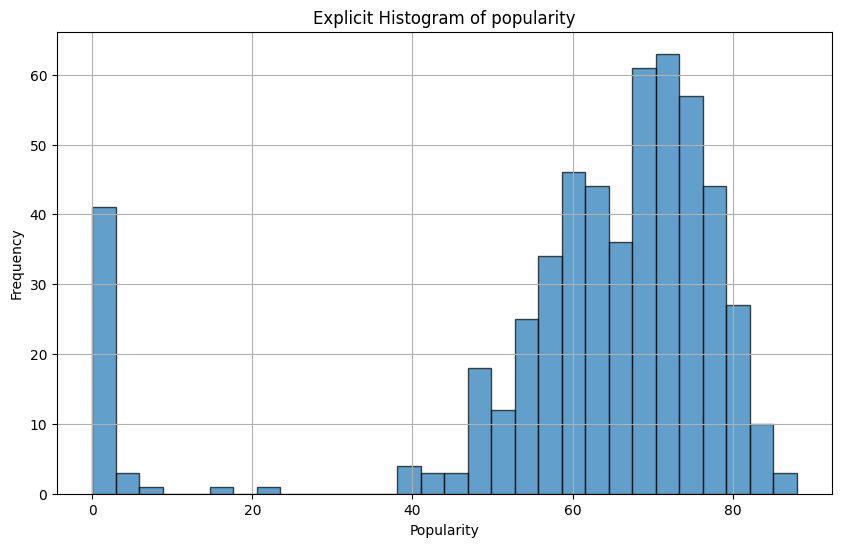

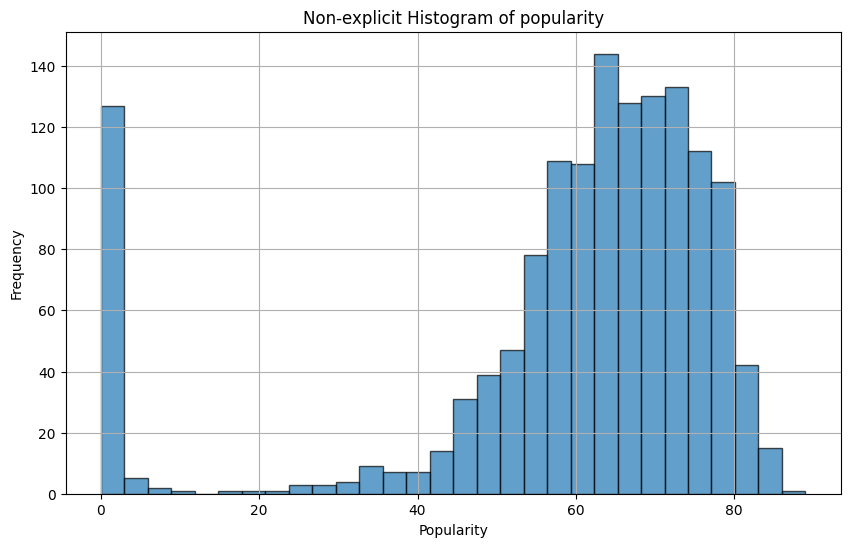

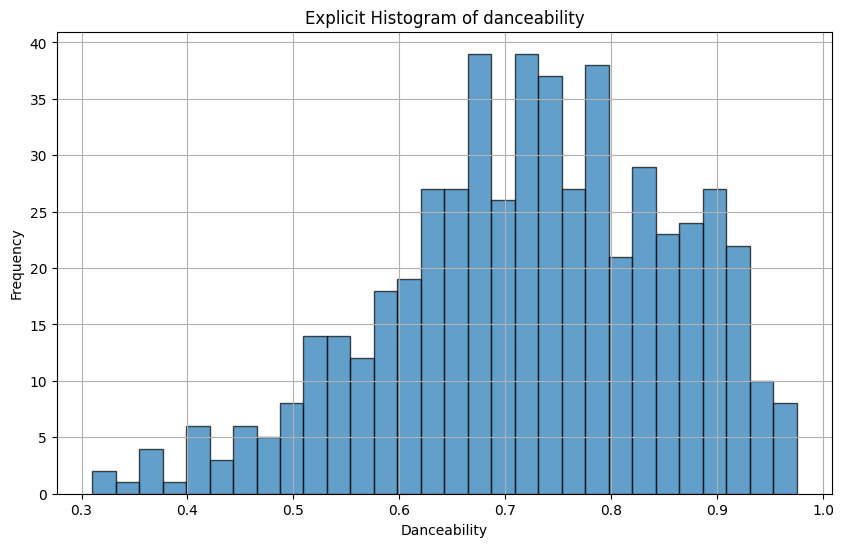

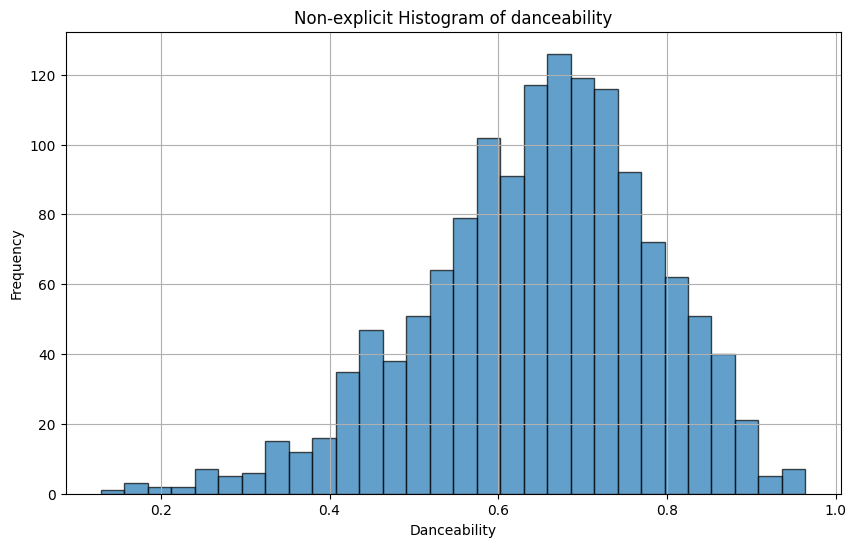

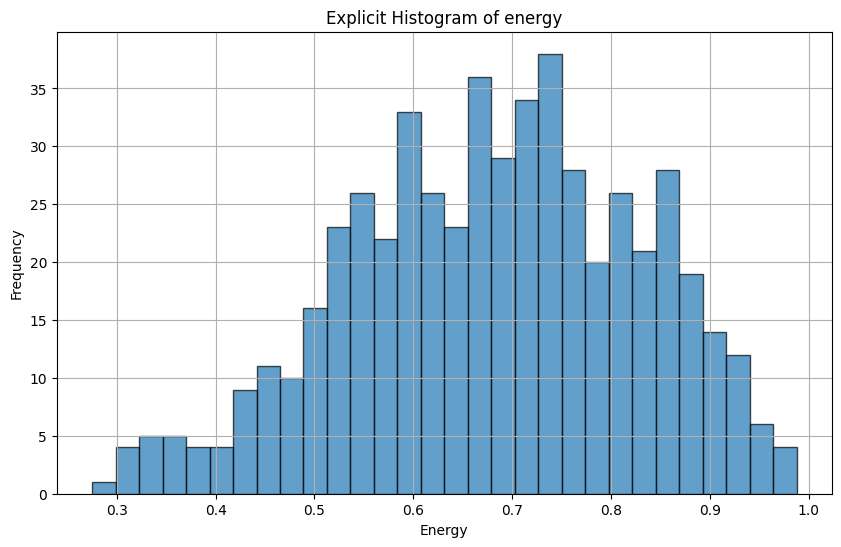

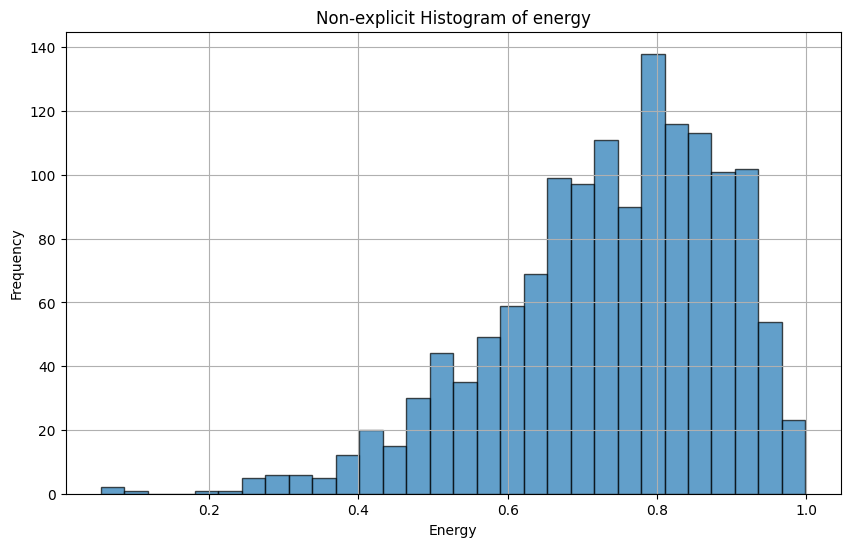

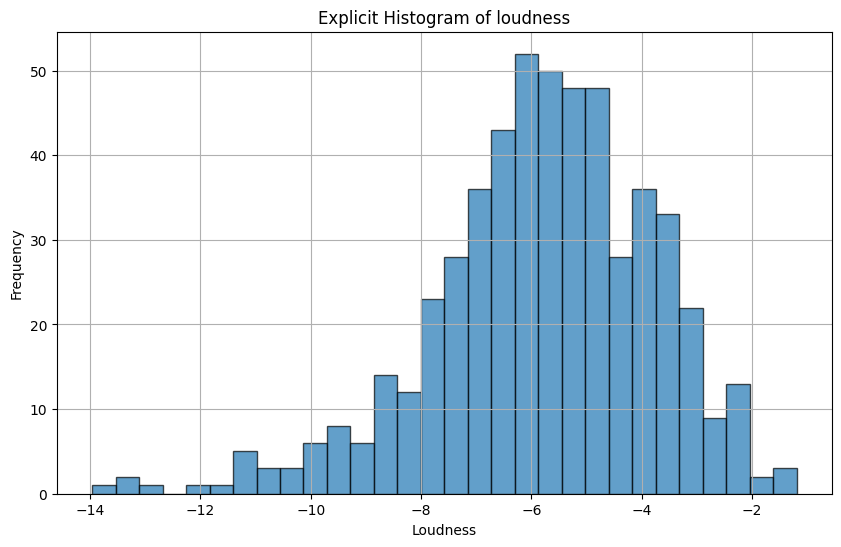

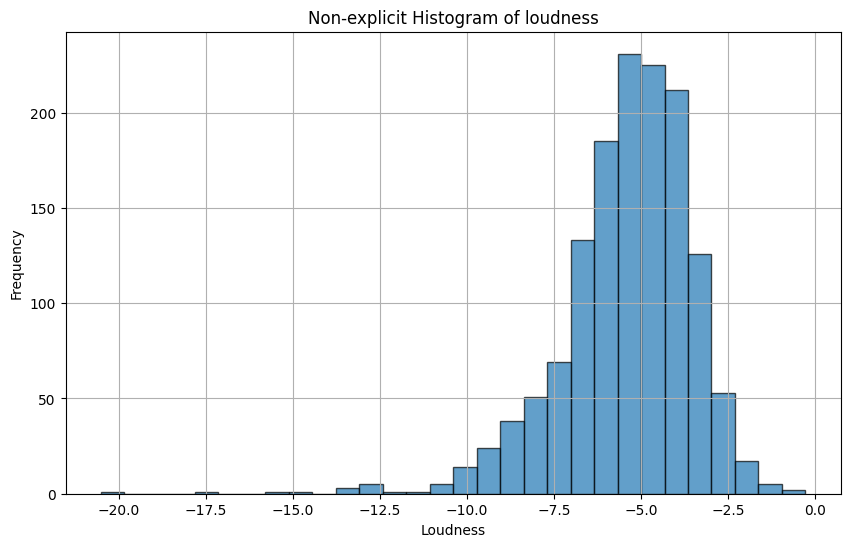

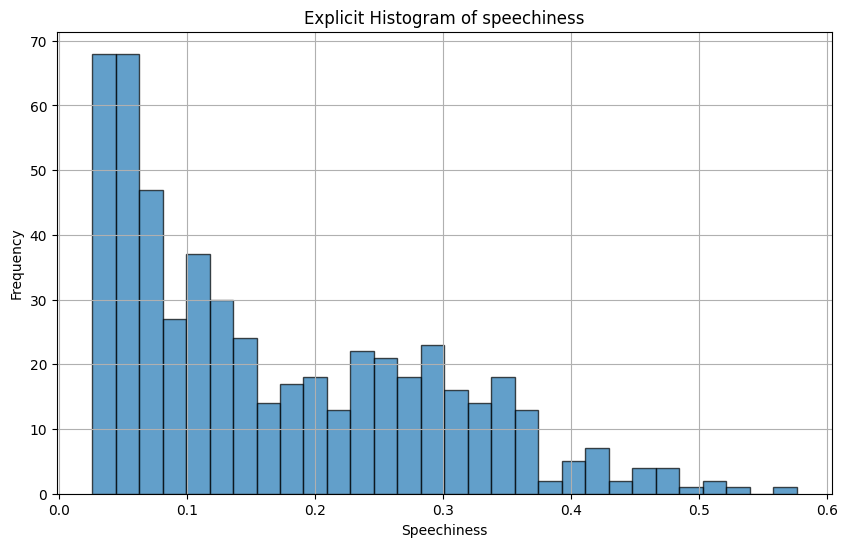

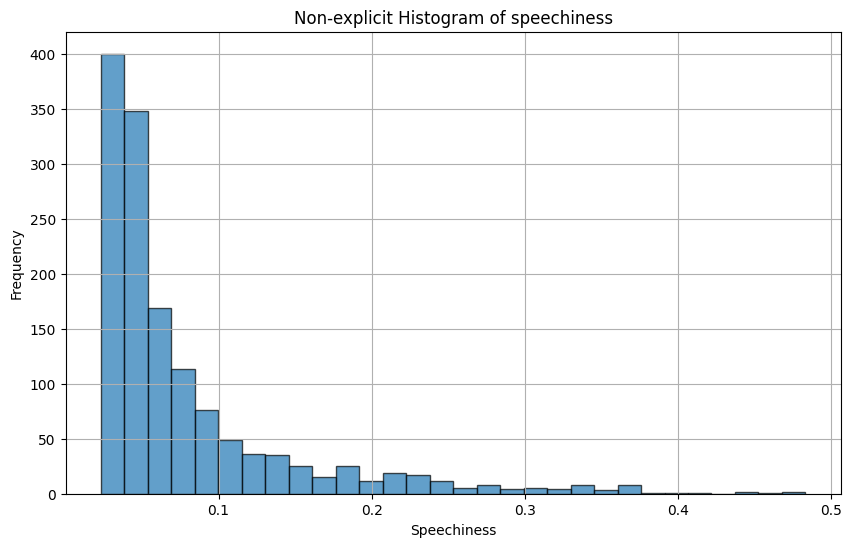

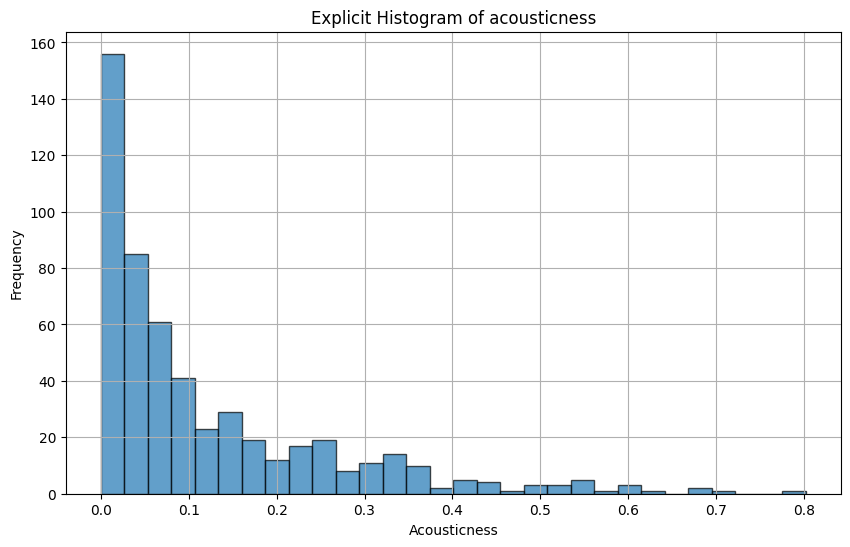

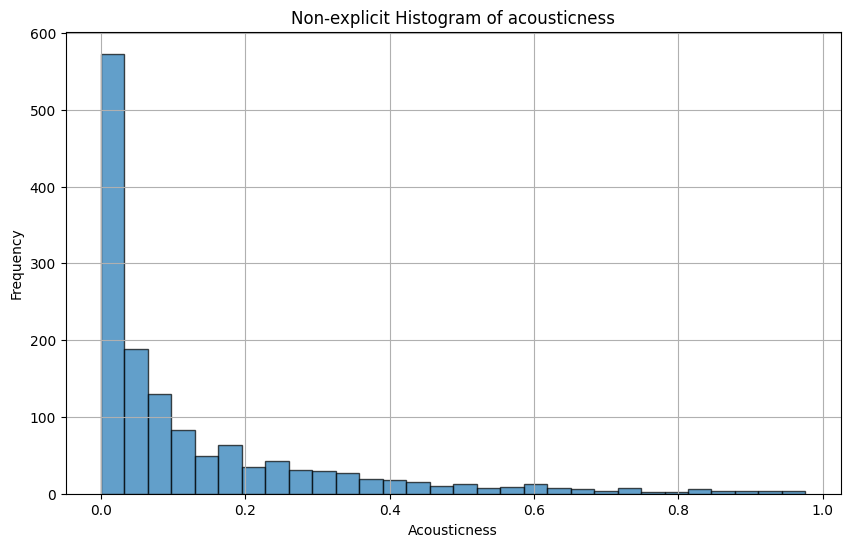

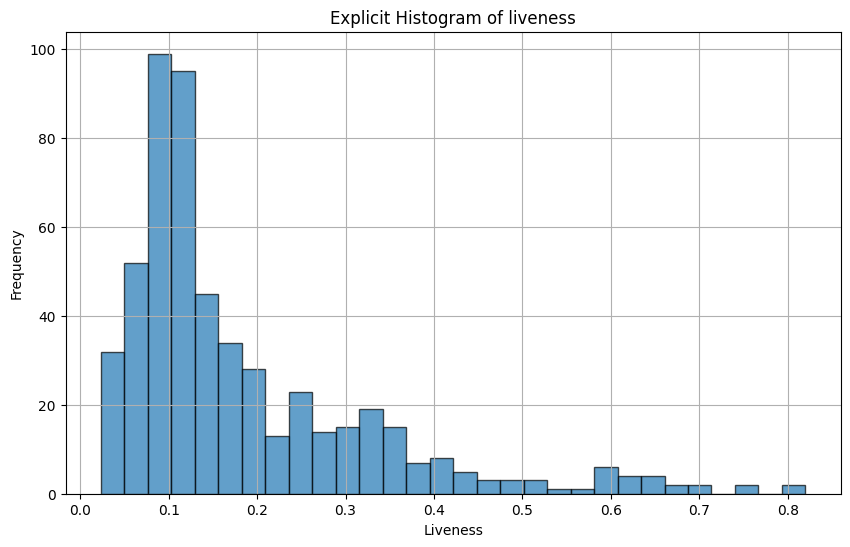

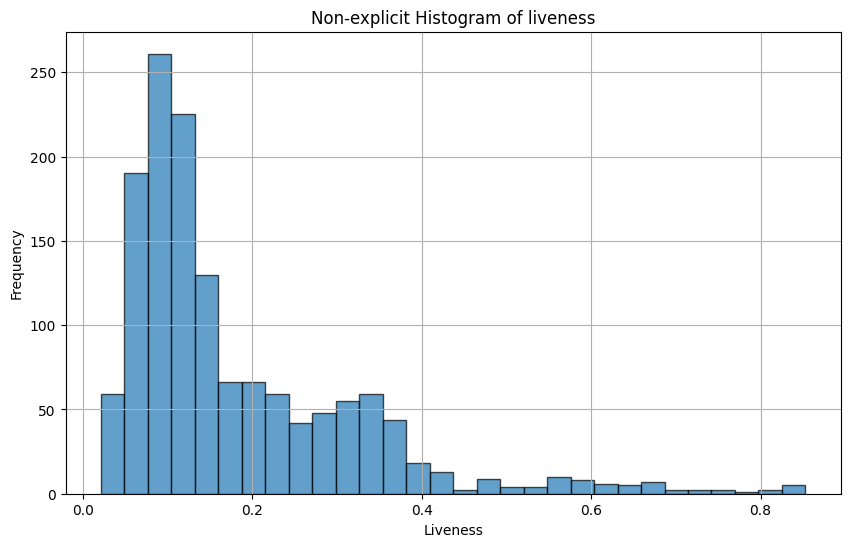

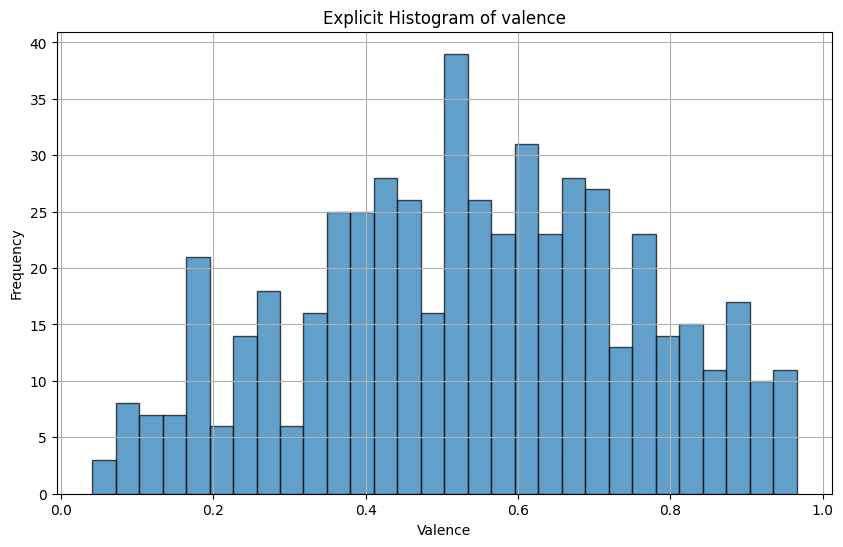

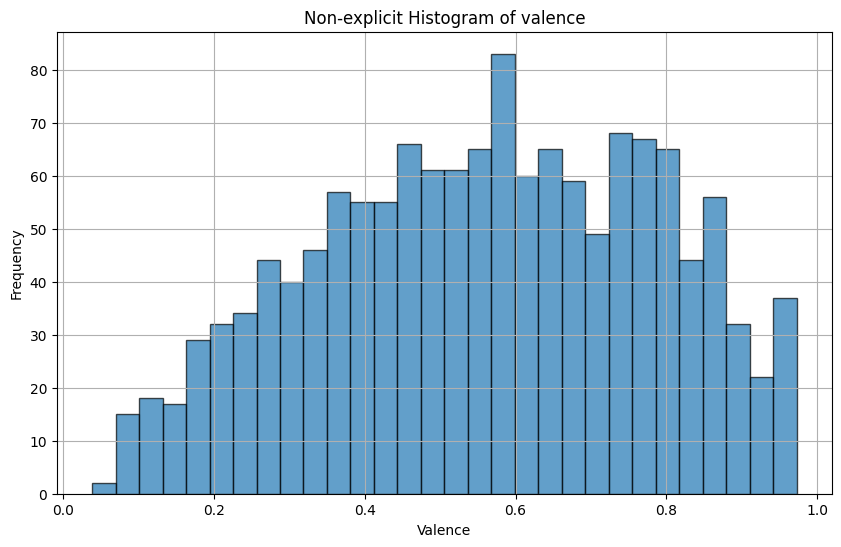

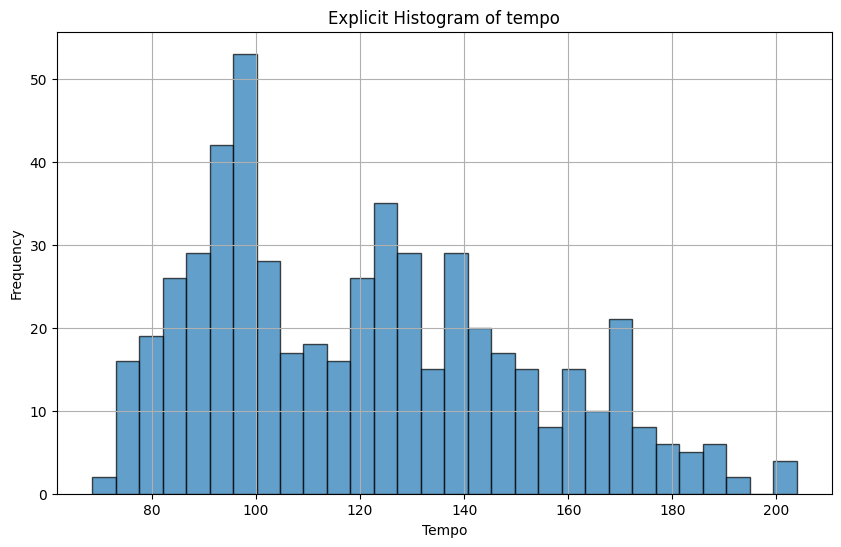

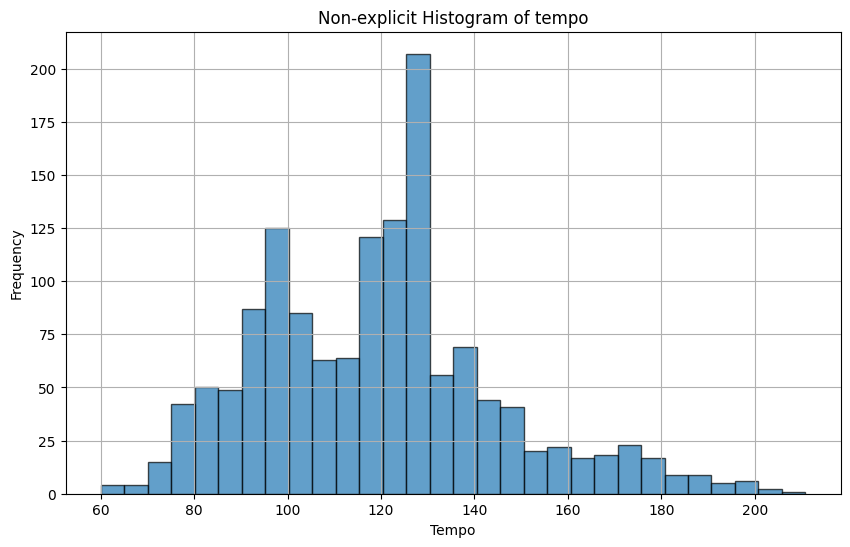

In [22]:
edf = df[df['explicit'] == True]
nedf = df[df['explicit'] == False]
# Function to plot the histogram
def plot_feature_histogram(df, feature):
    # Check if the feature exists in the dataframe
    if feature not in df.columns:
        raise ValueError(f"Feature '{{feature}}' not found in the dataframe.")
    
    plt.figure(figsize=(10, 6))
    plt.hist(df[feature], bins=30, edgecolor='k', alpha=0.7)
    # plt.title(f'Histogram of {feature}')
    if df is edf:
        plt.title(f"Explicit Histogram of {feature}")
    elif df is nedf:
        plt.title(f"Non-explicit Histogram of {feature}")
    plt.xlabel(feature.title())
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()
features = ['popularity', 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'liveness', 'valence', 'tempo']

for feature in features:
    plot_feature_histogram(edf, feature)
    plot_feature_histogram(nedf, feature)